# Lab work 2: Multi Class Classification using k-nearest neighbour(kNN)

**Name:** Zeynep Melisa Akyol<br>
**Email:** zea5820@thi.de <br>

1. Goal

<p> Study and assess the performance of the knn classifier for a Multiclass Problem. The goal is to compare two methods for finding the optimal knn parameters focusing upon the accuracy only. You will be using the known kaggle data source, the so called “wine quality”, a public usable data source. It provides more than 1000 samples with 11 attributes and its “Y” which designates the quality of a red wine.</p>

<p> The original Kaggle data source was modified towards having now three targets Y, i.e., the
wine quality or classes:</p>
<p> Y=0 poor quality for {Y=2,3,4},</p>
<p> Y=1 medium quality for {Y=5,6}</p>
<p> Y=2 premium quality for {Y=7,8}</p>

[Wine Quality Dataset](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset)

## Imports

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle

## Data Loading
Firstly, I import the necessary libraries and load the dataset.

In [9]:

file_path = "Wine_Test_02_6_8_red.csv"
data = pd.read_csv(file_path)

X = data.drop('quality', axis=1)
y = data['quality']

y_binarised = label_binarize(y, classes=[0, 1, 2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 1: k Value Determination by Minimising the Error
### Task 3.1: Finding the Optimal k Value

In this step, I will determine the optimal k value by minimising the error. This involves performing five runs with random selection of samples within the train/test split.

#### Part a) searching for the min error

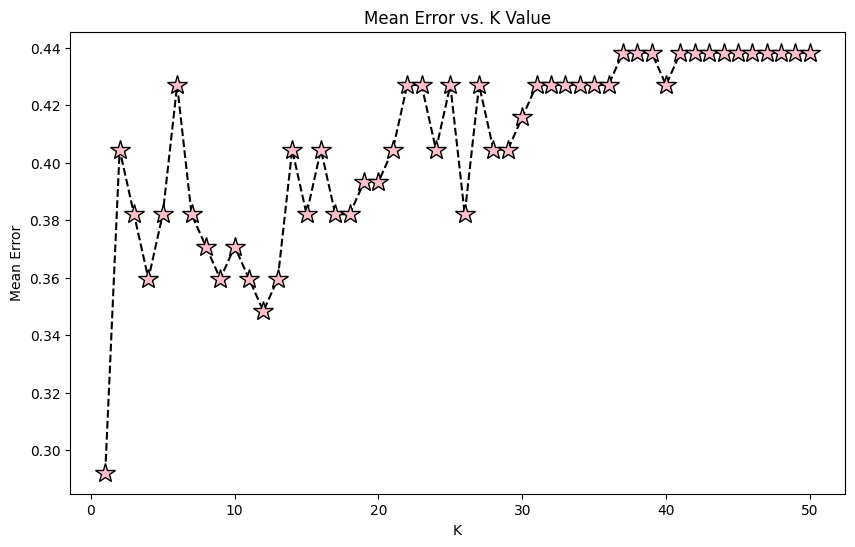

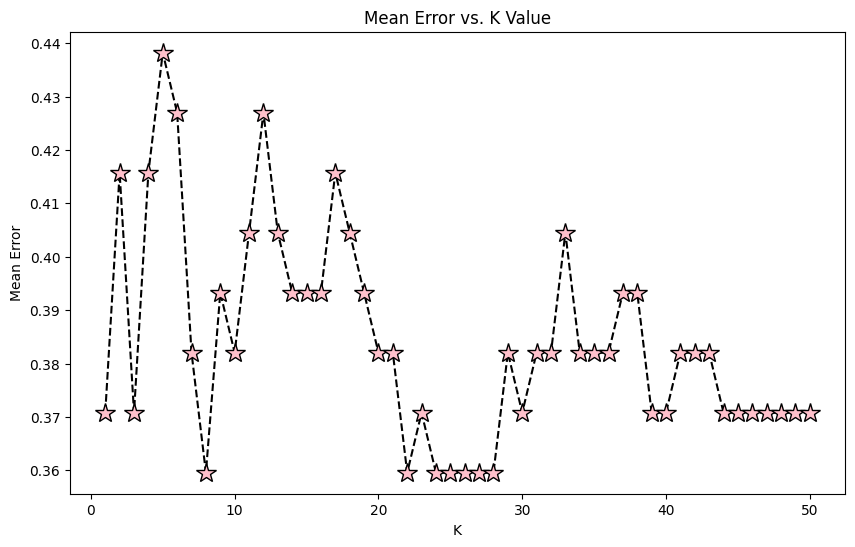

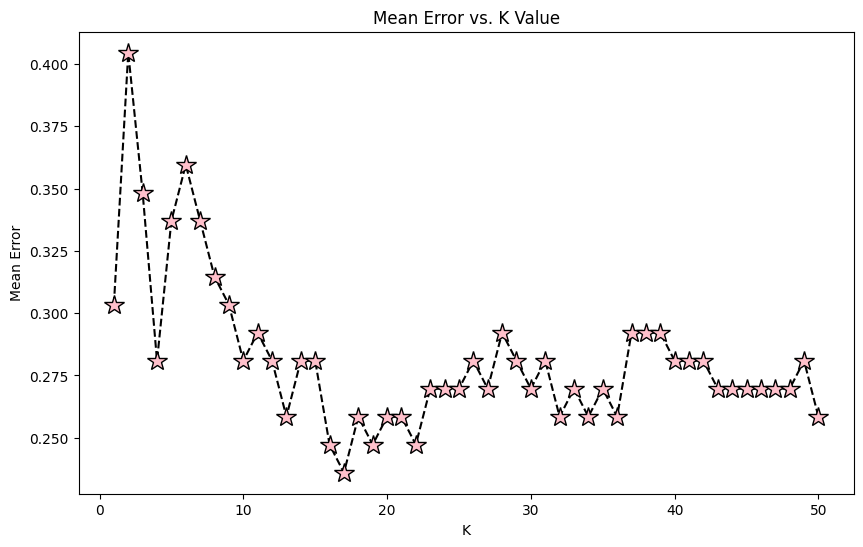

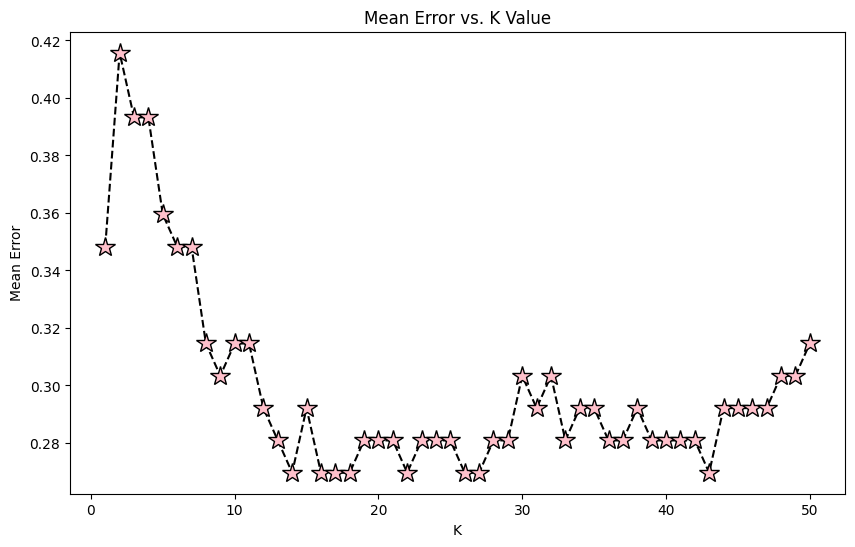

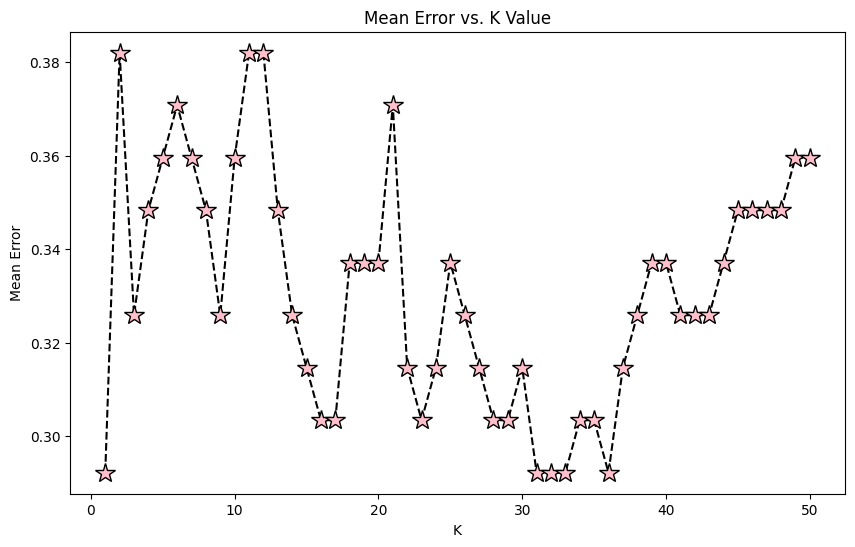

Chosen k values for each run: [1, 8, 17, 14, 1]
Accuracies for each run: [0.7078651685393258, 0.6404494382022472, 0.7640449438202247, 0.7303370786516854, 0.7078651685393258]
Mean accuracy: 0.7101123595505617


In [10]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

y_binarised = label_binarize(y, classes=[0, 1, 2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def find_optimal_k(X_train, y_train, X_test, y_test, k_range):
    error_rate = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        pred_k = knn.predict(X_test)
        error_rate.append(np.mean(pred_k != y_test))
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, error_rate, color='black', linestyle='dashed', marker='*', markerfacecolor='pink', markersize=15)
    plt.title('Mean Error vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Mean Error')
    plt.show()
    
    optimal_k = k_range[np.argmin(error_rate)]
    return optimal_k

k_range = range(1, 51)
chosen_k_values = []
results = []

for compute in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    best_k = find_optimal_k(X_train, y_train, X_test, y_test, k_range)
    chosen_k_values.append(best_k)
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, knn.predict(X_test))
    results.append(accuracy)

print("Chosen k values for each run:", chosen_k_values)
print("Accuracies for each run:", results)
print("Mean accuracy:", np.mean(results))

#### Part b) selecting the final k value

After performing five runs where I randomly select samples within the train/test split and plot the mean error against the k values, I choose a final k value. This final k value is determined by observing the plot and identifying the k value that results in the minimum error rate. The k value corresponding to the lowest point on the error curve is selected as the final k value. This value is considered optimal as it minimises the prediction error on the test dataset.

In [11]:
final_k = max(set(chosen_k_values), key=chosen_k_values.count)

final_results = []

for compute in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    knn = KNeighborsClassifier(n_neighbors=final_k)
    knn.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, knn.predict(X_test))
    final_results.append(accuracy)

print("Accuracies for each computation with finalised k:", final_results)
print("Mean accuracy with final k:", np.mean(final_results))

Accuracies for each computation with finalised k: [0.6292134831460674, 0.6067415730337079, 0.5842696629213483, 0.651685393258427, 0.7865168539325843]
Mean accuracy with final k: 0.651685393258427


#### part c) evaluating the final k value

With the final k value determined from part b), I then proceed to perform five additional runs. In each run, I randomly select samples within the train/test split and use the determined final k value to train the k-NN classifier. I then evaluate the classifier by calculating the accuracy for each run.

*The steps looks like this:*

**Random Selection and Splitting:** For each of the five runs, I randomly select samples to form the training and test datasets, maintaining the same 80/20 split ratio.

**Training with Final k Value:** I use the k-NN classifier with the final k value determined in part b) to train on the training dataset.

**Prediction and Accuracy Calculation:** I make predictions on the test dataset and calculate the accuracy for each run.
Finally, I compute the mean accuracy by averaging the accuracy values obtained from the five runs. This mean accuracy provides a robust measure of the classifier's performance with the chosen k value, accounting for variations due to random sampling.

In [12]:
fin_k = max(set(chosen_k_values), key=chosen_k_values.count)

accuracies = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(1000))
    
    knn = KNeighborsClassifier(n_neighbors=fin_k)
    knn.fit(X_train, y_train)
    
    pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, pred))

mean_accuracy = np.mean(accuracies)

print("Final k value (by minimising error):", fin_k)
print("Accuracies (by minimising error):", accuracies)
print("Mean accuracy (by minimising error):", mean_accuracy)

Final k value (by minimising error): 1
Accuracies (by minimising error): [0.6741573033707865, 0.7415730337078652, 0.7191011235955056, 0.7415730337078652, 0.7191011235955056]
Mean accuracy (by minimising error): 0.7191011235955056


#### part c) plotting roc curves

I plot the ROC curves for all three classes for one run.

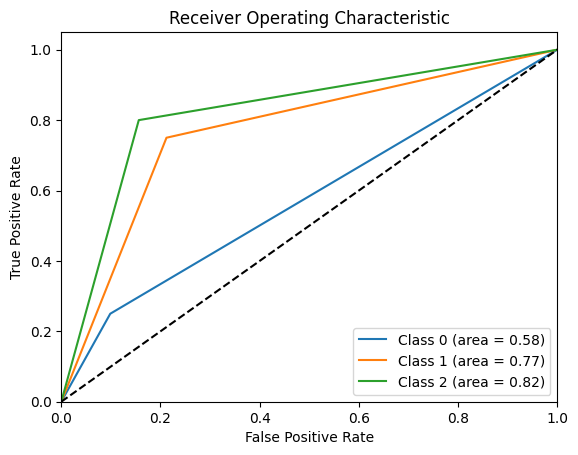

In [13]:
knn = KNeighborsClassifier(n_neighbors=fin_k)
knn.fit(X_train, y_train)
y_score = knn.predict_proba(X_test)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Step 2: k Value Determination by Employing GridSearch
### Task 3.2: Using GridSearch for Hyperparameter Tuning

I employ GridSearch to find the optimal k, distance metric algorithms, and algorithm types. This involves performing five runs and listing the selected metric algorithm, algorithm type, k value, and achieved accuracy for each run.

In [14]:
param_grid = {
    'n_neighbors': range(1, 51),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

accuracies_grid = []
for i in range(5):
    knn = KNeighborsClassifier(**best_params)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    accuracies_grid.append(accuracy_score(y_test, pred))

    mean_accuracy_grid = np.mean(accuracies_grid)

    print("Best parameters (GridSearch):", best_params)
    print("Accuracies (GridSearch):", accuracies_grid)
    print("Mean accuracy (GridSearch):", mean_accuracy_grid)


Best parameters (GridSearch): {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}
Accuracies (GridSearch): [0.7415730337078652]
Mean accuracy (GridSearch): 0.7415730337078652
Best parameters (GridSearch): {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}
Accuracies (GridSearch): [0.7415730337078652, 0.7415730337078652]
Mean accuracy (GridSearch): 0.7415730337078652
Best parameters (GridSearch): {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}
Accuracies (GridSearch): [0.7415730337078652, 0.7415730337078652, 0.7415730337078652]
Mean accuracy (GridSearch): 0.7415730337078652
Best parameters (GridSearch): {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}
Accuracies (GridSearch): [0.7415730337078652, 0.7415730337078652, 0.7415730337078652, 0.7415730337078652]
Mean accuracy (GridSearch): 0.7415730337078652
Best parameters (GridSearch): {'algorith